

# $\color{green}{\text{ 10. Non-negative matrix factorization }}$

- In non-negative matrix factorization, we are trying to factorise (separate) the **rating matrix** into **two matrices**, for **users** and for **films** separately, each of which also has **latent features** in the hidden axis. The sub-matrices are found so that **their product approximates ratings matrix R**.


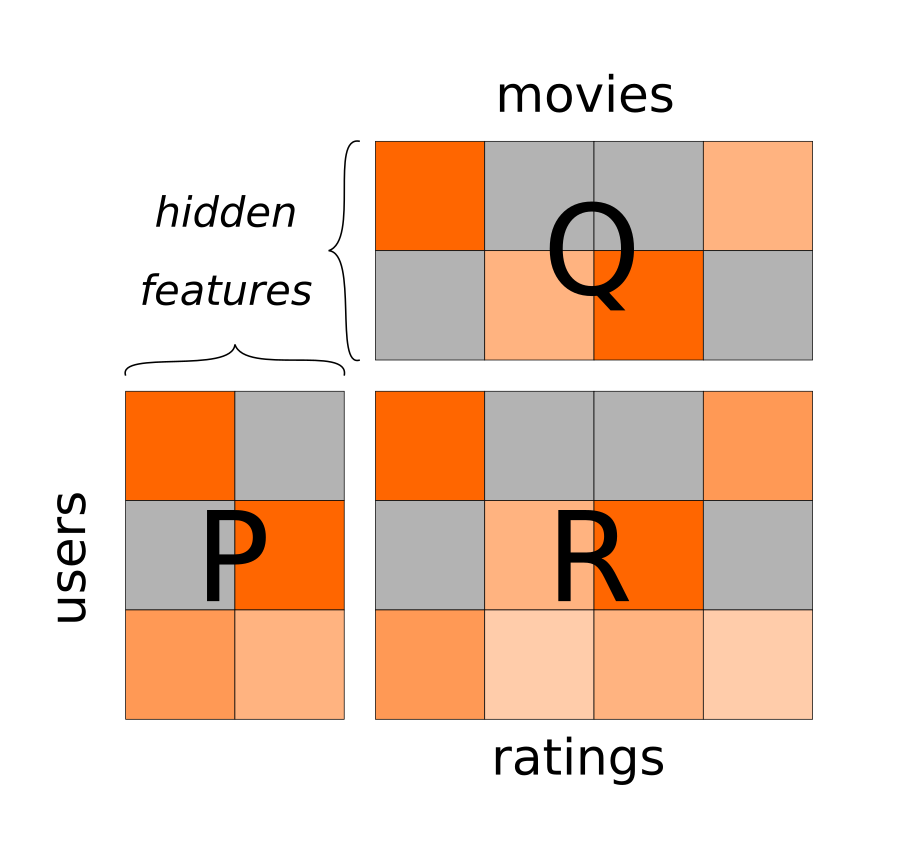

## In `sklearn`

### Read movie ratings in

In [1]:
import numpy as np
from sklearn.decomposition import NMF
import pandas as pd
from sklearn.impute import SimpleImputer
import seaborn as sns

In [2]:
# Data: Matrix of user ratings

In [4]:
ratings = pd.read_csv("ratings.csv", index_col=0)
ratings

,Forrest Gump,Shawshank Redemption,Pulp Fiction,Silence of the Lambs,"Matrix, The",Star Wars: Episode IV,Jurassic Park,Braveheart,Terminator 2,Toy Story,American Beauty,Dances with Wolves,Fargo,The Lion King
User,,,,,,,,,,,,,,
Paula,5.0,NaN,2.0,4.0,5.0,2.0,5.0,5.0,5.0,5.0,4.0,NaN,NaN,5.0
Joseph,NaN,2.0,2.0,3.0,2.0,NaN,NaN,3.0,5.0,2.0,4.0,2.0,3.0,5.0
Alex,5.0,5.0,4.0,NaN,5.0,4.0,4.0,4.0,2.0,4.0,NaN,3.0,NaN,4.0
Johannes,5.0,NaN,5.0,4.0,3.0,2.0,3.0,4.0,5.0,3.0,3.0,3.0,NaN,5.0
erkam,3.0,4.0,4.0,4.0,3.0,3.0,2.0,5.0,3.0,4.0,3.0,NaN,5.0,4.0
michael,5.0,4.0,2.0,5.0,4.0,1.0,2.0,3.0,0.0,3.0,5.0,4.0,NaN,3.0
Nadine,5.0,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,2.0,NaN,3.0,NaN,5.0
Ionel,3.0,NaN,3.0,3.0,5.0,NaN,5.0,5.0,5.0,4.0,NaN,NaN,NaN,NaN
Omid,5.0,5.0,NaN,NaN,5.0,3.0,3.0,4.0,4.0,NaN,1.0,NaN,NaN,1.0


In [6]:
films = ratings.columns.tolist()
films

['Forrest Gump',
 'Shawshank Redemption',
 'Pulp Fiction',
 'Silence of the Lambs',
 'Matrix, The',
 'Star Wars: Episode IV ',
 'Jurassic Park',
 'Braveheart',
 'Terminator 2',
 'Toy Story',
 'American Beauty',
 'Dances with Wolves',
 'Fargo',
 'The Lion King']

### How do we deal with missing values?

- Ideas:
- fill it with mean, median -- easy and quick
- using some simple model e.g Linear Regression or some other algorithm
- mean user rating for similar movie genre 
- KKN imputer (computionally expensive)
- Fill them with 0, can be interpreted like "person didn't like the move"



In [7]:
imputer = SimpleImputer(strategy="constant", fill_value=0)

In [8]:
ratings = pd.DataFrame(imputer.fit_transform(ratings), index =ratings.index, columns =ratings.columns)

In [9]:
ratings

,Forrest Gump,Shawshank Redemption,Pulp Fiction,Silence of the Lambs,"Matrix, The",Star Wars: Episode IV,Jurassic Park,Braveheart,Terminator 2,Toy Story,American Beauty,Dances with Wolves,Fargo,The Lion King
User,,,,,,,,,,,,,,
Paula,5.0,0.0,2.0,4.0,5.0,2.0,5.0,5.0,5.0,5.0,4.0,0.0,0.0,5.0
Joseph,0.0,2.0,2.0,3.0,2.0,0.0,0.0,3.0,5.0,2.0,4.0,2.0,3.0,5.0
Alex,5.0,5.0,4.0,0.0,5.0,4.0,4.0,4.0,2.0,4.0,0.0,3.0,0.0,4.0
Johannes,5.0,0.0,5.0,4.0,3.0,2.0,3.0,4.0,5.0,3.0,3.0,3.0,0.0,5.0
erkam,3.0,4.0,4.0,4.0,3.0,3.0,2.0,5.0,3.0,4.0,3.0,0.0,5.0,4.0
michael,5.0,4.0,2.0,5.0,4.0,1.0,2.0,3.0,0.0,3.0,5.0,4.0,0.0,3.0
Nadine,5.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,2.0,0.0,3.0,0.0,5.0
Ionel,3.0,0.0,3.0,3.0,5.0,0.0,5.0,5.0,5.0,4.0,0.0,0.0,0.0,0.0
Omid,5.0,5.0,0.0,0.0,5.0,3.0,3.0,4.0,4.0,0.0,1.0,0.0,0.0,1.0


### Create a model

Model assumes $R \sim PQ$ where $Q$ is a matrix that has every movie classified according to genres (components) and $P$ shows the user preferences for these components. 

`sklearn` has an `NMF` model that can create the components' matrices for both the users and the movies of the original data frame.

#### Step 1. Create a movie-genre matrix

We get get the matrix $Q$, which tells us how much each of the movies belongs to each of the 2 hidden features / genres, with `nmf.components_`.

In [17]:
nmf= NMF(n_components=2)

- Components (of hidden feutures, in our example 'genres'):
    - Small n_components = trains fast, might underfit
    - High n_components = trains slow, might overfit

In [18]:
# To calculate the Q
nmf.fit(ratings)

/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "


NMF(n_components=2)

In [19]:
Q = nmf.components_
Q

array([[2.35346467, 2.14524538, 1.1054772 , 0.41888779, 1.7867393 ,
        1.50741435, 0.6293941 , 1.24868009, 0.14105671, 1.17650893,
        1.16526067, 1.03279586, 0.00820412, 1.9090605 ],
       [0.91338188, 0.        , 1.09609563, 1.63896874, 1.32706034,
        0.22658973, 1.40330875, 1.7552256 , 2.19017773, 1.32727753,
        0.93786328, 0.19874264, 0.54709026, 1.06478742]])

In [22]:
# To get matrices Q and P

Q = pd.DataFrame(nmf.components_, columns=films, index=["Feature1" ,"Feature2"])
Q
# Q: model.components_
# P: model.transform(Ratings)

,Forrest Gump,Shawshank Redemption,Pulp Fiction,Silence of the Lambs,"Matrix, The",Star Wars: Episode IV,Jurassic Park,Braveheart,Terminator 2,Toy Story,American Beauty,Dances with Wolves,Fargo,The Lion King
Feature1,2.353465,2.145245,1.105477,0.418888,1.786739,1.507414,0.629394,1.248680,0.141057,1.176509,1.165261,1.032796,0.008204,1.909060
Feature2,0.913382,0.000000,1.096096,1.638969,1.327060,0.226590,1.403309,1.755226,2.190178,1.327278,0.937863,0.198743,0.547090,1.064787


<AxesSubplot:>

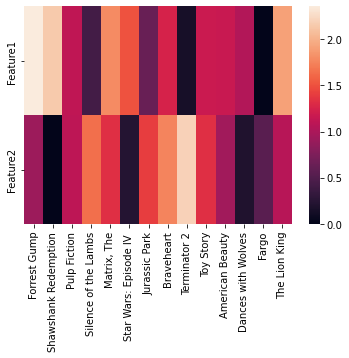

In [23]:
sns.heatmap(Q, annot=False)

#### Create user-genre matrix 

See how the transform takes the samples (users) and transforms the  data for them as opposed to `model.components` that combines the features/columns (films) of the original df with newly created features.

When you think about the process remember the question: Which movie do I recommend to which user. Users are the rows in your df and you first need a model before creating the user-features matrix.

In [24]:
# .transform() to get P:
P = pd.DataFrame(nmf.transform(ratings), columns=["Feature1", "Feature2"], index=ratings.index)

In [25]:
P

,Feature1,Feature2
User,,
Paula,0.757400,2.511155
Joseph,0.341948,1.688455
Alex,2.148007,0.554426
Johannes,0.880600,2.082909
erkam,1.140156,1.681494
michael,1.771973,0.710838
Nadine,1.060131,0.000120
Ionel,0.000000,2.421711
Omid,1.403911,0.622561


<AxesSubplot:ylabel='User'>

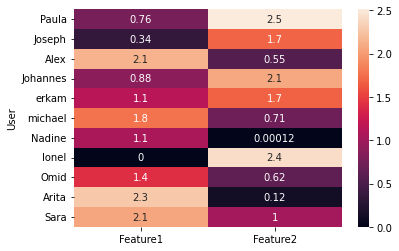

In [26]:
sns.heatmap(P, annot=True)

### (Reconstruct predicted $\hat{R}$!) <- not necessary for predictions !

In [28]:
recommendations_reconstructed = pd.DataFrame(np.dot(P, Q), index=ratings.index, columns=films)
recommendations_reconstructed

,Forrest Gump,Shawshank Redemption,Pulp Fiction,Silence of the Lambs,"Matrix, The",Star Wars: Episode IV,Jurassic Park,Braveheart,Terminator 2,Toy Story,American Beauty,Dances with Wolves,Fargo,The Lion King
User,,,,,,,,,,,,,,
Paula,4.076159,1.624810,3.589755,4.432970,4.685731,1.710718,4.000629,5.353394,5.606712,4.224088,3.237689,1.281314,1.380042,4.119769
Joseph,2.346968,0.733563,2.228724,2.910563,2.851654,0.898045,2.584644,3.390603,3.746250,2.643353,1.981999,0.688731,0.926543,2.450646
Alex,5.561662,4.608003,2.982277,1.808461,4.573686,3.363564,2.129974,3.655317,1.517283,3.263027,3.022964,2.328641,0.320944,4.691022
Johannes,3.974953,1.889103,3.256551,3.782696,4.337549,1.799395,3.477209,4.755564,4.686156,3.800633,2.979613,1.323443,1.146764,3.898975
erkam,4.219164,2.445915,3.103495,3.233514,4.268606,2.099697,3.077263,4.375092,3.843598,3.573213,2.905591,1.511733,0.929283,3.967061
michael,4.819542,3.801316,2.738022,1.907299,4.109378,2.832166,2.112794,3.460308,1.806810,3.028221,2.731479,1.971360,0.403430,4.139694
Nadine,2.495091,2.274242,1.172083,0.444273,1.894338,1.598084,0.667409,1.323976,0.149802,1.247413,1.235442,1.094923,0.008763,2.023983
Ionel,2.211947,0.000000,2.654426,3.969108,3.213756,0.548735,3.398408,4.250648,5.303977,3.214282,2.271233,0.481297,1.324894,2.578607
Omid,3.872691,3.011733,2.234378,1.608440,3.334599,2.257341,1.757259,2.845771,1.561551,2.478025,2.219799,1.573683,0.352115,3.343046


In [30]:
abs(ratings- recommendations_reconstructed)

,Forrest Gump,Shawshank Redemption,Pulp Fiction,Silence of the Lambs,"Matrix, The",Star Wars: Episode IV,Jurassic Park,Braveheart,Terminator 2,Toy Story,American Beauty,Dances with Wolves,Fargo,The Lion King
User,,,,,,,,,,,,,,
Paula,0.923841,1.624810,1.589755,0.432970,0.314269,0.289282,0.999371,0.353394,0.606712,0.775912,0.762311,1.281314,1.380042,0.880231
Joseph,2.346968,1.266437,0.228724,0.089437,0.851654,0.898045,2.584644,0.390603,1.253750,0.643353,2.018001,1.311269,2.073457,2.549354
Alex,0.561662,0.391997,1.017723,1.808461,0.426314,0.636436,1.870026,0.344683,0.482717,0.736973,3.022964,0.671359,0.320944,0.691022
Johannes,1.025047,1.889103,1.743449,0.217304,1.337549,0.200605,0.477209,0.755564,0.313844,0.800633,0.020387,1.676557,1.146764,1.101025
erkam,1.219164,1.554085,0.896505,0.766486,1.268606,0.900303,1.077263,0.624908,0.843598,0.426787,0.094409,1.511733,4.070717,0.032939
michael,0.180458,0.198684,0.738022,3.092701,0.109378,1.832166,0.112794,0.460308,1.806810,0.028221,2.268521,2.028640,0.403430,1.139694
Nadine,2.504909,2.274242,1.172083,0.444273,1.894338,1.598084,1.332591,1.323976,0.149802,0.752587,1.235442,1.905077,0.008763,2.976017
Ionel,0.788053,0.000000,0.345574,0.969108,1.786244,0.548735,1.601592,0.749352,0.303977,0.785718,2.271233,0.481297,1.324894,2.578607
Omid,1.127309,1.988267,2.234378,1.608440,1.665401,0.742659,1.242741,1.154229,2.438449,2.478025,1.219799,1.573683,0.352115,2.343046


Let's also see the difference from the original ratings.

In [31]:
nmf.reconstruction_err_

16.260713046288906

The reconstructed error is a [measure](https://mathworld.wolfram.com/FrobeniusNorm.html) of the sum of the distances. We are trying to minimise this!

### A new user joins our group!

#### Add a new user

In [34]:
mia = [[np.nan, 5,3,5, np.nan, np.nan, 5,4, np.nan, 5,2,1, np.nan,np.nan]]

In [35]:
mia = pd.DataFrame(mia, columns=films, index=['Mia'])

In [36]:
mia

,Forrest Gump,Shawshank Redemption,Pulp Fiction,Silence of the Lambs,"Matrix, The",Star Wars: Episode IV,Jurassic Park,Braveheart,Terminator 2,Toy Story,American Beauty,Dances with Wolves,Fargo,The Lion King
Mia,NaN,5,3,5,NaN,NaN,5,4,NaN,5,2,1,NaN,NaN


In [38]:
#We can fill the missing values with zeros
mia = mia.fillna(0)
mia

,Forrest Gump,Shawshank Redemption,Pulp Fiction,Silence of the Lambs,"Matrix, The",Star Wars: Episode IV,Jurassic Park,Braveheart,Terminator 2,Toy Story,American Beauty,Dances with Wolves,Fargo,The Lion King
Mia,0.0,5,3,5,0.0,0.0,5,4,0.0,5,2,1,0.0,0.0


In [39]:
Q  

,Forrest Gump,Shawshank Redemption,Pulp Fiction,Silence of the Lambs,"Matrix, The",Star Wars: Episode IV,Jurassic Park,Braveheart,Terminator 2,Toy Story,American Beauty,Dances with Wolves,Fargo,The Lion King
Feature1,2.353465,2.145245,1.105477,0.418888,1.786739,1.507414,0.629394,1.248680,0.141057,1.176509,1.165261,1.032796,0.008204,1.909060
Feature2,0.913382,0.000000,1.096096,1.638969,1.327060,0.226590,1.403309,1.755226,2.190178,1.327278,0.937863,0.198743,0.547090,1.064787


In [41]:
#P

P_mia = nmf.transform(mia)
P_mia

array([[0.54590564, 1.26958291]])

In [45]:
R_mia = np.dot(P_mia, Q)
R_mia

array([[2.44438368, 1.17110156, 1.99507052, 2.30947992, 2.6602042 ,
        1.11058045, 2.12520661, 2.91006594, 2.85761588, 2.32735174,
        1.82681757, 0.81612935, 0.69905512, 2.39400282]])

## Get the recommendations for Mia:

In [46]:
recommendations_mia = pd.DataFrame(R_mia,
                                index=['Mia'],
                                columns=films)

In [47]:
recommendations_mia

,Forrest Gump,Shawshank Redemption,Pulp Fiction,Silence of the Lambs,"Matrix, The",Star Wars: Episode IV,Jurassic Park,Braveheart,Terminator 2,Toy Story,American Beauty,Dances with Wolves,Fargo,The Lion King
Mia,2.444384,1.171102,1.995071,2.30948,2.660204,1.11058,2.125207,2.910066,2.857616,2.327352,1.826818,0.816129,0.699055,2.394003


In [50]:
recommendations = pd.concat([recommendations_reconstructed, recommendations_mia])

In [51]:
recommendations

,Forrest Gump,Shawshank Redemption,Pulp Fiction,Silence of the Lambs,"Matrix, The",Star Wars: Episode IV,Jurassic Park,Braveheart,Terminator 2,Toy Story,American Beauty,Dances with Wolves,Fargo,The Lion King
Paula,4.076159,1.624810,3.589755,4.432970,4.685731,1.710718,4.000629,5.353394,5.606712,4.224088,3.237689,1.281314,1.380042,4.119769
Joseph,2.346968,0.733563,2.228724,2.910563,2.851654,0.898045,2.584644,3.390603,3.746250,2.643353,1.981999,0.688731,0.926543,2.450646
Alex,5.561662,4.608003,2.982277,1.808461,4.573686,3.363564,2.129974,3.655317,1.517283,3.263027,3.022964,2.328641,0.320944,4.691022
Johannes,3.974953,1.889103,3.256551,3.782696,4.337549,1.799395,3.477209,4.755564,4.686156,3.800633,2.979613,1.323443,1.146764,3.898975
erkam,4.219164,2.445915,3.103495,3.233514,4.268606,2.099697,3.077263,4.375092,3.843598,3.573213,2.905591,1.511733,0.929283,3.967061
michael,4.819542,3.801316,2.738022,1.907299,4.109378,2.832166,2.112794,3.460308,1.806810,3.028221,2.731479,1.971360,0.403430,4.139694
Nadine,2.495091,2.274242,1.172083,0.444273,1.894338,1.598084,0.667409,1.323976,0.149802,1.247413,1.235442,1.094923,0.008763,2.023983
Ionel,2.211947,0.000000,2.654426,3.969108,3.213756,0.548735,3.398408,4.250648,5.303977,3.214282,2.271233,0.481297,1.324894,2.578607
Omid,3.872691,3.011733,2.234378,1.608440,3.334599,2.257341,1.757259,2.845771,1.561551,2.478025,2.219799,1.573683,0.352115,3.343046
Arita,5.491196,4.902423,2.661825,1.159923,4.247239,3.472837,1.611843,3.070582,0.593167,2.852736,2.778880,2.384772,0.086397,4.494343


Add Mia's ratings to the ratings table:

In [48]:
ratings = pd.concat([ratings, pd.DataFrame(mia, index=["Mia"], columns=films)])

In [49]:
ratings

,Forrest Gump,Shawshank Redemption,Pulp Fiction,Silence of the Lambs,"Matrix, The",Star Wars: Episode IV,Jurassic Park,Braveheart,Terminator 2,Toy Story,American Beauty,Dances with Wolves,Fargo,The Lion King
Paula,5.0,0.0,2.0,4.0,5.0,2.0,5.0,5.0,5.0,5.0,4.0,0.0,0.0,5.0
Joseph,0.0,2.0,2.0,3.0,2.0,0.0,0.0,3.0,5.0,2.0,4.0,2.0,3.0,5.0
Alex,5.0,5.0,4.0,0.0,5.0,4.0,4.0,4.0,2.0,4.0,0.0,3.0,0.0,4.0
Johannes,5.0,0.0,5.0,4.0,3.0,2.0,3.0,4.0,5.0,3.0,3.0,3.0,0.0,5.0
erkam,3.0,4.0,4.0,4.0,3.0,3.0,2.0,5.0,3.0,4.0,3.0,0.0,5.0,4.0
michael,5.0,4.0,2.0,5.0,4.0,1.0,2.0,3.0,0.0,3.0,5.0,4.0,0.0,3.0
Nadine,5.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,2.0,0.0,3.0,0.0,5.0
Ionel,3.0,0.0,3.0,3.0,5.0,0.0,5.0,5.0,5.0,4.0,0.0,0.0,0.0,0.0
Omid,5.0,5.0,0.0,0.0,5.0,3.0,3.0,4.0,4.0,0.0,1.0,0.0,0.0,1.0
Arita,5.0,4.0,4.0,0.0,5.0,3.5,0.0,3.5,0.0,4.0,4.0,0.0,0.0,5.0


### Save a model

In [58]:
import pickle

binary = pickle.dumps(nmf)
open('nmf.bin', 'wb').write(binary)
binary

b'\x80\x04\x95\xeb\x02\x00\x00\x00\x00\x00\x00\x8c\x1asklearn.decomposition._nmf\x94\x8c\x03NMF\x94\x93\x94)\x81\x94}\x94(\x8c\x0cn_components\x94K\x02\x8c\x04init\x94\x8c\x04warn\x94\x8c\x06solver\x94\x8c\x02cd\x94\x8c\tbeta_loss\x94\x8c\tfrobenius\x94\x8c\x03tol\x94G?\x1a6\xe2\xeb\x1cC-\x8c\x08max_iter\x94K\xc8\x8c\x0crandom_state\x94N\x8c\x05alpha\x94G\x00\x00\x00\x00\x00\x00\x00\x00\x8c\x08l1_ratio\x94G\x00\x00\x00\x00\x00\x00\x00\x00\x8c\x07verbose\x94K\x00\x8c\x07shuffle\x94\x89\x8c\x0eregularization\x94\x8c\x04both\x94\x8c\x0en_features_in_\x94K\x0e\x8c\x13reconstruction_err_\x94\x8c\x15numpy.core.multiarray\x94\x8c\x06scalar\x94\x93\x94\x8c\x05numpy\x94\x8c\x05dtype\x94\x93\x94\x8c\x02f8\x94\x89\x88\x87\x94R\x94(K\x03\x8c\x01<\x94NNNJ\xff\xff\xff\xffJ\xff\xff\xff\xffK\x00t\x94bC\x08\x8es\x17\x17\xbeB0@\x94\x86\x94R\x94\x8c\rn_components_\x94K\x02\x8c\x0bcomponents_\x94h\x17\x8c\x0c_reconstruct\x94\x93\x94h\x1a\x8c\x07ndarray\x94\x93\x94K\x00\x85\x94C\x01b\x94\x87\x94R\x94(K\x01

In [59]:

nmf_read = pickle.loads(binary)

In [51]:
nmf_read

NMF(n_components=2)

## Project Task: NMF recommender function

* Collect different user queries for "typical" users (e.g. a horror movie buff) and evaluate the algorithm
* Set the number of components to a very low number (e.g. 2). What happens to the recommendations?
* Implement a recommender function that recommends movies to a new user based on the NMF model!

In [ ]:
def recommend_nmf(query, model, k=10):
    """
    Filters and recommends the top k movies for any given input query based on a trained NMF model. 
    Returns a list of k movie ids.
    """
    # 1. candiate generation
    
    # construct a user vector
    
   
    # 2. scoring
    
    # calculate the score with the NMF model
    
    
    # 3. ranking
    
    # set zero score to movies allready seen by the user
    
    # return the top-k highst rated movie ids or titles
    
    return [364, 372, 43, 34, 243]